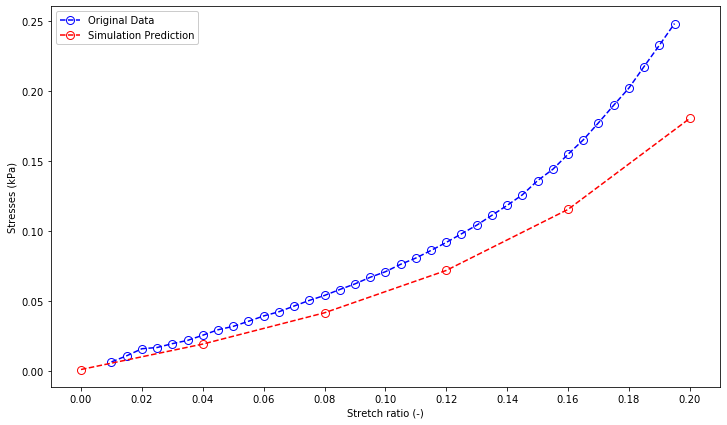

In [50]:
import pandas as pd                       # Allows to use data in tables
import matplotlib.pyplot as plt           # Allows to do plots
import os                                 # Allows to use path
import SimpleFunctions as SF

NumberElementsTested = [1,2,3,5,10,20]
NumberElements = NumberElementsTested[5]

LoadCases = ['Compression', 'Tension', 'SimpleShear']
LoadCase = LoadCases[2]

# Get last values computed
df = pd.read_csv('OptimizationResults/'+ str(NumberElements) + 'Elements.txt', sep=' ', decimal='.')
FinalValues = df.iloc[-1]

# Simulation parameters
FinalRelativeStretch = 0.1
RelativeStepSize     = 0.02

# optimized values
Nu = FinalValues.Nu
Mu = FinalValues.Mu
Alpha = FinalValues.Alpha

D = 3*(1-2*Nu)/(Mu*(1+Nu))

# Mesh
Dimensions = [5,5,5]
[Mesh, V, u, du, v] = SF.MeshDefinition(Dimensions, NumberElements)
[F, J, C, Ic] = SF.Kinematics(u)

# Strain energy density function (Ogden)
Psi = SF.CompressibleOgden(Mu, Alpha, D, C, Ic, J)

# Simulate the solution
DataFrame = SF.SolveProblem(LoadCase, FinalRelativeStretch, RelativeStepSize, Dimensions, NumberElements, Mesh, V, u, du, v, Ic, J, F, Psi)

# Experimental data
FolderPath = os.path.join('/home/msimon/Desktop/SHARED/ScriptsAndData/ExperimentalData/')
FilePath = os.path.join(FolderPath, 'CR_' + LoadCase + '_ExpDat.csv')
ExpData = pd.read_csv(FilePath, sep=';', header=None, decimal=',')

# Plot
plt.rc('figure', figsize=[12,7])
fig = plt.figure()
#fig.suptitle('Simulations %i Elements by side'%(NumberElements))
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot(ExpData[0], ExpData[1],  color = 'b', linestyle = '--', label = 'Original Data', marker = 'o', markersize = 8, fillstyle='none')
ax.plot(DataFrame.Stretches, DataFrame.P,  color = 'r', linestyle = '--', label = 'Simulation Prediction', marker = 'o', markersize = 8, fillstyle='none')
ax.set_xlabel('Stretch ratio (-)')
ax.set_ylabel('Stresses (kPa)')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.legend(loc='upper left', frameon=True, framealpha=1)
#plt.title(LoadCase)
#plt.savefig(os.path.join(Output_Path, FileName + '.pdf'))
plt.show()

In [51]:
# Folder for the results
Output_Path = 'ResultsOgden'
os.makedirs(Output_Path, exist_ok=True)

FileName = str(NumberElements) + 'Elements_' + LoadCase

# Save table and figure
DataFrame.to_csv(os.path.join(Output_Path, FileName))